<a class="anchor" id="0"></a>
# **Linear Regression Tutorial with Python**


Hello friends,


In this kernel, I implement Linear Regression with Python and Scikit-Learn. I build a Linear Regression to predict the annual medical expense of the customer.We can accomplish this by using Linear Regression model.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Linear Regression](#1)
2.	[Assumptions of Linear Regression](#2)
3.	[Linear Regression Intuition](#3)
4.	[Types of Linear Regression](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[Exploratory data analysis](#7)
8.	[Feature engineering](#8)
9.	[Feature scaling](#9)
10.	[Declare feature vector and target variable](#10)
11.	[Split data into separate training and test set](#11)
12.	[Model training](#12)
13.	[Predict results](#13)
14.	[Evaluation Metrics](#14)
15.	[Results and conclusion](#15)
16. [References](#16)


# **1. Introduction to Linear Regression** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)

**Linear regression** analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.<br>
<br>

In otherwords, **Linear Regression** is a statistical supervised learning technique to predict the quantitative variable by forming a linear relationship with one or more independent features.<br>
It helps determine:<br>
→ If a independent variable does a good job in predicting the dependent variable.<br>
→ Which independent variable plays a significant role in predicting the dependent variable.

# **2. Assumptions of Linear Regression** <a class="anchor" id="2"></a>


[Table of Contents](#0.1)


The Linear Regression model requires several key assumptions. These are as follows:-

1. The Independent variables should be linearly related to the dependent variables.This can be examined with the help of several visualization techniques like: Scatter plot or maybe you can use Heatmap or pairplot(to visualize every features in the data in one particular plot).

2. Every feature in the data is Normally Distributed.This again can be checked with the help of different visualization Techniques,such as Q-Q plot,histogram and much more.

3. There should be little or no multi-collinearity in the data.The best way to check the prescence of multi-collinearity is to perform VIF(Variance Inflation Factor).
4. The mean of the residual is zero. A residual is the difference between the observed y-value and the predicted y-value.However, Having residuals closer to zero means the model is doing great.
5. Residuals obatined should be normally distributed.This can be verified using the Q-Q Plot on the residuals.
6. Variance of the residual throughout the data should be same.This is known as homoscedasticity.This can be checked with the help of residual vs fitted plot.
7. There should be little or no Auto-Correlation is the data.Auto-Correlation Occurs when the residuals are not independent of each other.This usally takes place in time series analysis.You can perform Durbin-Watson test or plot ACF plot to check for the autocorrelation.If the value of Durbin-Watson test is 2 then that means no autocorrelation,If value < 2 then there is positive correlation and if the value is between >2 to 4 then there is negative autocorrelation.

* NOTE : If the features in the dataset are not normally distributed try out different transformation techniques to transform the distribution of the features present in the data.

### **Can you say,why these assumptions are needed?**
The Gauss-Markov theorem states that if your linear regression model satisfies the first six classical assumptions, then ordinary least squares (OLS) regression produces unbiased estimates that have the smallest variance of all possible linear estimators.

<a href="https://statisticsbyjim.com/regression/gauss-markov-theorem-ols-blue/#:~:text=The%20Gauss-Markov%20theorem%20states,of%20all%20possible%20linear%20estimators." target="_blank">
        Visit the Gauss-Markov Theorem Article
</a>

# **3. Linear Regression Intution** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)
Let's build model using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

### **Linear Regression algorithm works as follows:**

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 

For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.
### **Matrix Formulation**

In general we can write above vector as $$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Now we combine all aviable individual vector into single input matrix of size $(m,n)$ and denoted it by $\mathbf{X}$ input matrix, which consist of all training exaples,
$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent parameter of function and dependent variable in vactor form as  
$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$.

### **Cost function**

  A cost function measures how much error in the model is in terms of ability to estimate the relationship between $x$ and $y$. 
  We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.
  
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$
To implement the linear regression, take training example add an extra column that is $x_0$ feature, where $\mathbf{x_0=1}$. $\mathbf{x_{o}} = \left( \begin{smallmatrix} x_{i0} & x_{i1} & x_{i2} &.&.&.& x_{mi} \end{smallmatrix} \right)$,where $\mathbf{x_{i0} =0}$ and input matrix will become as

$$\mathbf{X} = \left( \begin{smallmatrix} x_{10} & x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{20} & x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{30} & x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                 .&.&.&.&. &.&.&.& \\
                                 .&.&.&.&. &.&.&.& \\
                                x_{m0} & x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n+1)}$$  
Each of the m input samples is similarly a column vector with n+1 rows $x_0$ being 1 for our convenience, that is $\mathbf{x_{10},x_{20},x_{30} .... x_{m0} =1}$. Now we rewrite the ordinary least square cost function in matrix form as
$$\mathbf{J(\theta) = \frac{1}{m} (X\theta - y)^T(X\theta - y)}$$

Let's look at the matrix multiplication concept,the multiplication of two matrix happens only if number of column of firt matrix is equal to number of row of second matrix. Here input matrix $\mathbf{X}$ of size $\mathbf{(m,n+1)}$, parameter of function is of size $(n+1,1)$ and dependent variable vector of size $\mathbf{(m,1)}$. The product of matrix $\mathbf{X_{(m,n+1)}\theta_{(n+1,1)}}$ will return a vector of size $\mathbf{(m,1)}$, then product of $\mathbf{(X\theta - y)^T_{(1,m})(X\theta - y)_{(m,1)}}$ will return size of unit vector. 



### **Normal Equation**
The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of $\mathbf{J(\theta)}$ with respect to $\theta$ and equate to $0$. The derivative of function is nothing but if a small change in input what would be the change in output of function.
 $$\mathbf{min_{\theta_0,\theta_1..\theta_n} J({\theta_0,\theta_1..\theta_n})}$$
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} =0}$$ 
 where $\mathbf{j = 0,1,2,....n}$
 
 Now we will apply partial derivative of our cost function,
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial }{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y) }$$
 I will throw $\mathbf{\frac {1}{m}}$ part away since we are going to compare a derivative to $0$. And solve $\mathbf{J(\theta)}$,  
 
 $$\mathbf{J(\theta) = (X\theta -y)^T(X\theta - y)}$$
 $$\mathbf{= (X\theta)^T - y^T)(X\theta -y)}$$   
 $$\mathbf{= (\theta^T X^T - y^T)(X\theta - y)}$$
 $$\mathbf{= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y}$$
 $$\mathbf{ = \theta^T X^T X \theta  - 2\theta^T X^T y + y^T y}$$

Here $\mathbf{y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}}$ because unit vector.

$$\mathbf{\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta  - 2\theta^T X^T y + y^T y )}$$
$$\mathbf{ = X^T X \frac {\partial \theta^T \theta}{\partial\theta} - 2 X^T y \frac{\partial \theta^T}{\partial\theta} + \frac {\partial y^T y}{\partial\theta}}$$
Partial derivative $\mathbf{\frac {\partial x^2}{\partial x} = 2x}$, $\mathbf{\frac {\partial kx^2}{\partial x} = kx}$,
$\mathbf{\frac {\partial Constact}{\partial x} = 0}$

$$\mathbf{\frac{\partial J(\theta)}{\partial\theta} = X^T X 2\theta - 2X^T y +0}$$
$$\mathbf{ 0 = 2X^T X \theta - 2X^T y}$$
$$\mathbf{ X^T X \theta = X^T }$$
$$\mathbf{ \theta = (X^TX)^{-1} X^Ty }$$
this the normal equation for linear regression

# **4. Types of Linear Regression** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


### **1. Simple Linear Regression:**<br>
Simple Linear Regression involves modeling the relationship between a dependent variable (target) and a single independent variable (feature) using a linear equation.<br>
<br>
### **2. Multiple Linear Regression:**<br>
Multiple Linear Regression extends simple linear regression to model the relationship between a dependent variable and multiple independent variables.<br>
### **3. Multivariate Linear Regression:**<br>
Multivariate Linear Regression involves modeling the relationship between multiple dependent variables and multiple independent variables.<br>
In summary, simple linear regression deals with one dependent and one independent variable, multiple linear regression deals with one dependent variable and multiple independent variables, and multivariate linear regression deals with multiple dependent and multiple independent variables. Each type of regression has its own use cases based on the nature of the data and the relationships being modeled.

# **5. Import libraries** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.express as px # data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class="anchor" id="6"></a>


[Table of Contents](#0.1)

In [2]:
medicalData = './data/medical-charges.csv'

medical_df = pd.read_csv(medicalData)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **7. Exploratory data analysis** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that the dataset contains 7 columns and 1338 rows. Below are some statistics for the numerical columns:

In [4]:
medical_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### 1. Age:<br>

* The average age in the dataset is approximately 39 years, with a standard deviation of around 14 years.<br>
* The ages range from 18 to 64 years.<br>
* The majority of individuals fall between the ages of 27 and 51, as indicated by the interquartile range (25% to 75%).
#### 2. BMI (Body Mass Index): <br>

* The average BMI is approximately 30.66, with a standard deviation of around 6.10.<br>
* BMIs range from 15.96 to 53.13.<br>
* The interquartile range for BMI is from 26.30 to 34.69.<br>
#### 3. Number of Children:<br>

* On average, individuals have approximately 1.09 children, with a standard deviation of around 1.21.<br>
* The number of children ranges from 0 to 5.<br>
* The majority of individuals have 0 or 1 child, as indicated by the interquartile range.<br>
#### 4. Medical Charges:<br>

* The average medical charge is approximately $13,270, with a significant standard deviation of around $12,110.<br>
* Medical charges range from $1,121.87 to $63,770.43.<br>
* The interquartile range for medical charges is from $4,740.29 to $16,639.91.<br>


In [5]:
medical_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the given dataset

## **Univariate data analysis** 
#### **Age**
The age column is numerical. The dataset has a minimum age of 18 and a maximum age of 64. As a result, a box plot and a histogram with 47 bins—one for each year—allow us to see the age distribution. Plotly will be used to make the chart interactive, but Seaborn can be used to build charts of a similar kind.

In [6]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1,
                  title=dict(text='Distribution of Age', x=0.5))
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.
#### **BMI(Body Mass Index)**

In [7]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1,
                  title=dict(text='Distribution of BMI(Body Mass Index)', x=0.5))
fig.show()

The measurements of body mass index seem to form a Gaussian distribution/Normal Distribution/Bell Curve centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted (source):<br>
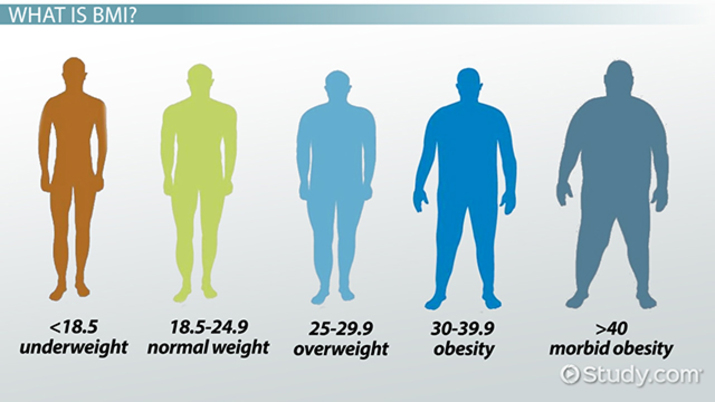<br>
#### **Sex**

In [8]:
medical_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

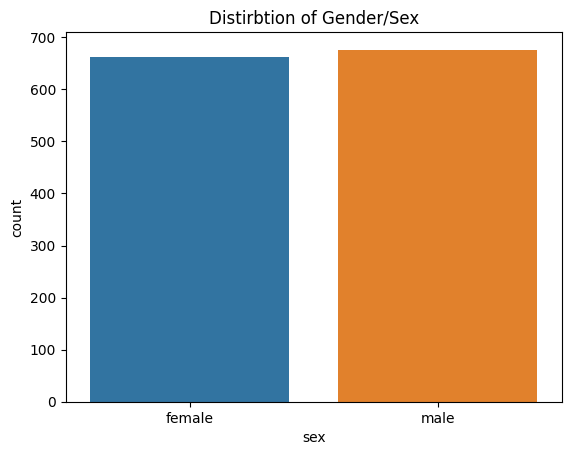

In [9]:
# Create a bar chart for the 'sex' column
sns.countplot(data=medical_df,x='sex')
plt.title("Distirbtion of Gender/Sex")
plt.show()

The dataset contains two gender which are almost identical in number
#### **Chidleren**

In [10]:
medical_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
# Create a bar chart for the 'children' column
fig = px.histogram(medical_df, x='children', title='Distribution of Childern')

# Show the figure
fig.show()

Most of the parents in the dataset doesn't have children(574) and almost half of the size have signle child(324) and 
240 have two children, 157 have 3 children, 25 have 4 children and 18 have 5 children respectively.
#### **Smoker**

In [12]:
# Create a bar chart for the 'smoker' column
fig = px.histogram(medical_df, x='smoker', title='Distribution of Smoker')

# Show the figure
fig.show()

In the given dataset, there are non smokers are almost 4 times the size of smokers
#### **Region**

In [13]:
medical_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
# Create a bar chart for the 'region' column
fig = px.histogram(medical_df, x='region', title='Distribution of Region')

# Show the figure
fig.show()

The patients are from 4 regions are they are almost the same in number.
#### **Charges**
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict.

In [15]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box',  
                   color_discrete_sequence=['green'], 
                   title='Distribution of Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases.
## **Multivriate Analysis**
#### **Charges Vs Smoker**

In [16]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300 and the median for smokers is close to 35,000
#### **Charges Vs Sex**

In [17]:
px.histogram(medical_df, x='charges', color='sex', title='Charges Vs Sex')

From the plot we can see that males are in double in number in comparison to females and most of the charge for both of them is between 2k to 14k.
#### **Charges Vs Region**

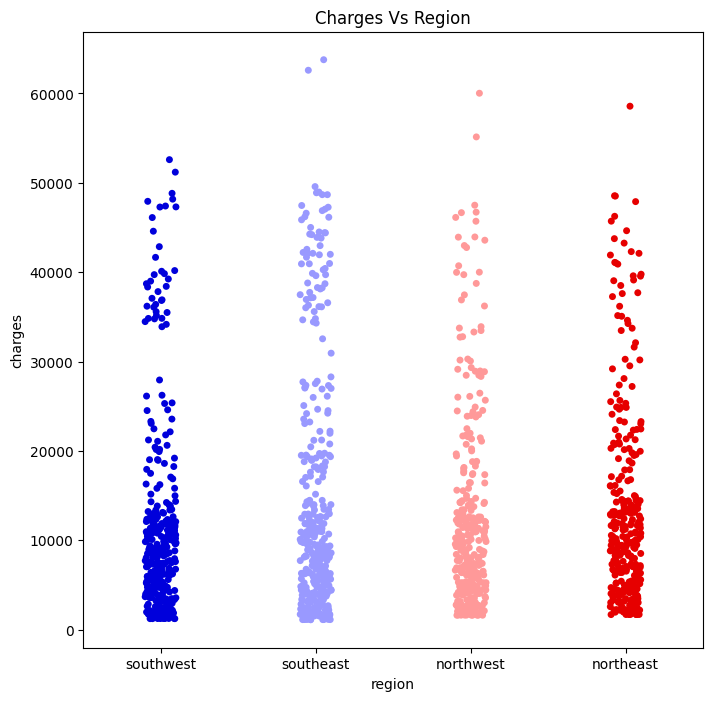

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(x='region',y='charges',data=medical_df, 
             palette='seismic')
plt.title("Charges Vs Region")
plt.show()

#### **Smoker Vs Sex**

In [21]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker Vs Sex')

### **Age and Charges**

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [22]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
### **BMI and Charges**

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [23]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.
#### **Charges Vs Childern w.r.t. Sex**

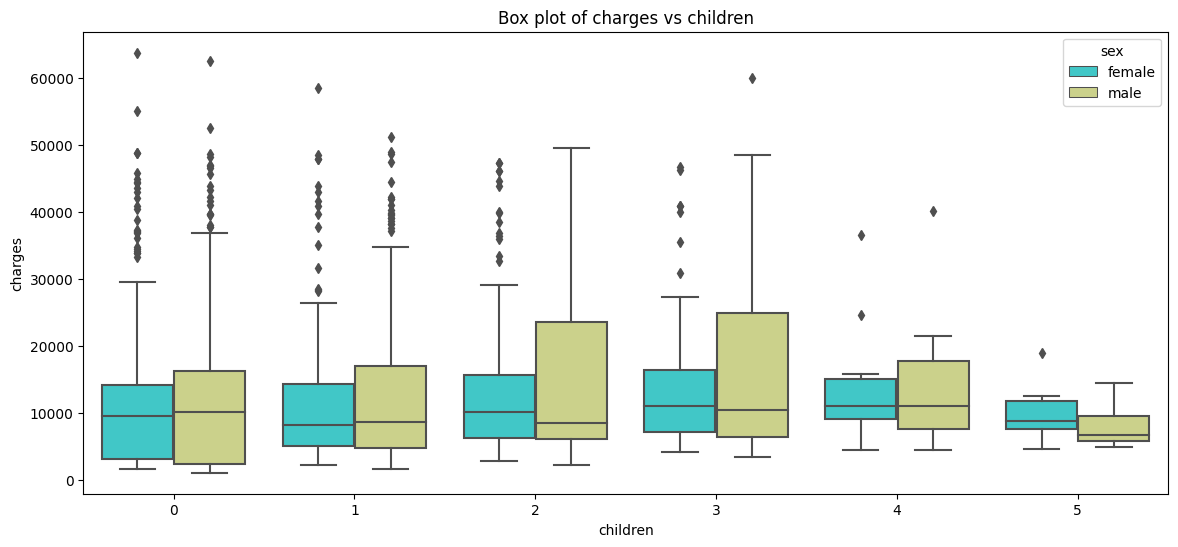

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=medical_df,palette='rainbow')
plt.title('Box plot of charges vs children');

### **Correction Matrix**




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

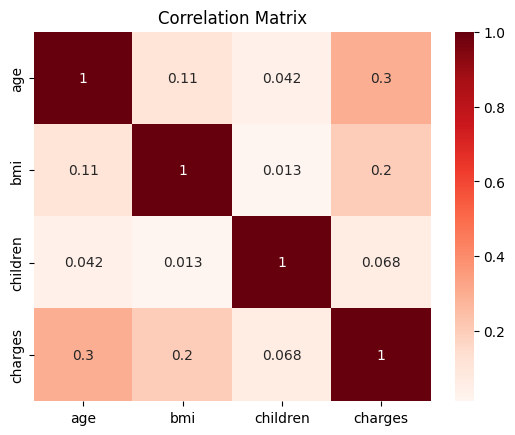

In [24]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

#### **Correlation vs causation fallacy:** 
Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

## **8. Feature Engineering** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.<br>
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
 1. Label Encoding
 2. One hot encoding
 3. Dummy variable trap

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using *pandas get_dummies* function we can do all above three step in line of code. We will this fuction  to get dummy variable for sex, children,smoker,region features. By setting *drop_first =True* function will remove dummy variable trap by droping one variable and original variable.But I prefer to use **Label Encoder** as it reduces the number of input colums passed to model training.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Encode categorical variables
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()
df = medical_df.copy()
df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

# **9. Feature Scaling** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)

In [32]:
# Apply normalization using StandardScaler
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)  # 'passthrough' means no further transformation for LabelEncoded categorical features
    ])

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>


[Table of Contents](#0.1)

In [33]:
# Prepare the data
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)

In [36]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1070, 6), (268, 6))

# **12. Model training** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)

### **Create PipeLine for Linear Regression**

In [41]:
# Simple Linear Regression
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train[['age']], y_train)

# Multiple Linear Regression
multiple_lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', LinearRegression())])
multiple_lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', 'passthrough',
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

# **13. Predict results** <a class="anchor" id="13"></a>


[Table of Contents](#0.1)

In [42]:
# Predictions
y_pred_simple = simple_lr_model.predict(X_test[['age']])
y_pred_multiple = multiple_lr_model.predict(X_test)

# **14. Evaluation Metrics** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute **Mean Square Error** using formula 
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

In [43]:
# Evaluation metrics
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f"Simple Linear Regression:")
print(f"Mean Squared Error: {mse_simple}")
print(f"R-squared: {r2_simple}")
print("\n")

print(f"Multiple Linear Regression:")
print(f"Mean Squared Error: {mse_multiple}")
print(f"R-squared: {r2_multiple}")


Simple Linear Regression:
Mean Squared Error: 135983957.4805469
R-squared: 0.12408973539501944


Multiple Linear Regression:
Mean Squared Error: 33635210.43117841
R-squared: 0.7833463107364538


### **Model Validation**
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

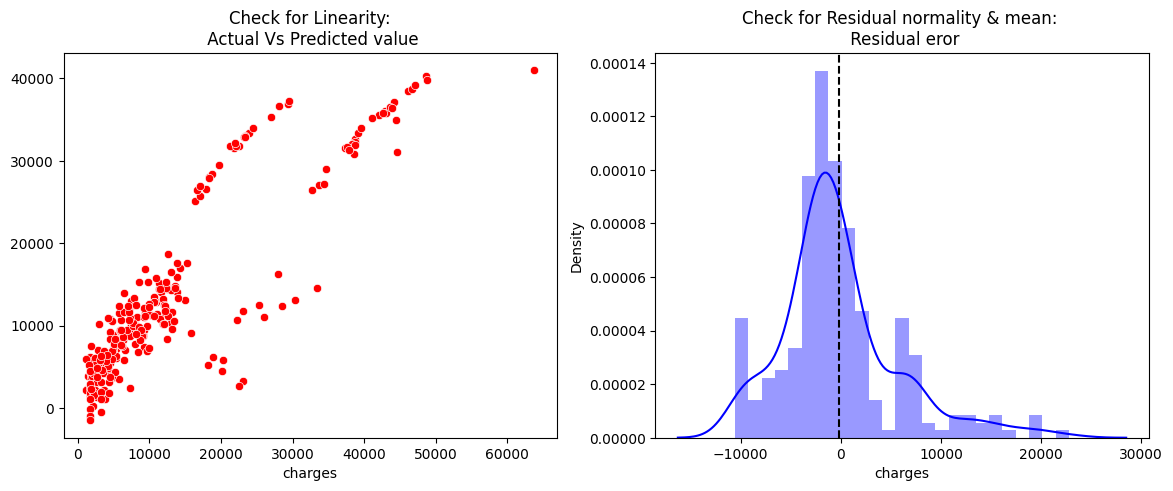

In [45]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_multiple,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_multiple),ax=ax,color='b')
ax.axvline((y_test - y_pred_multiple).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

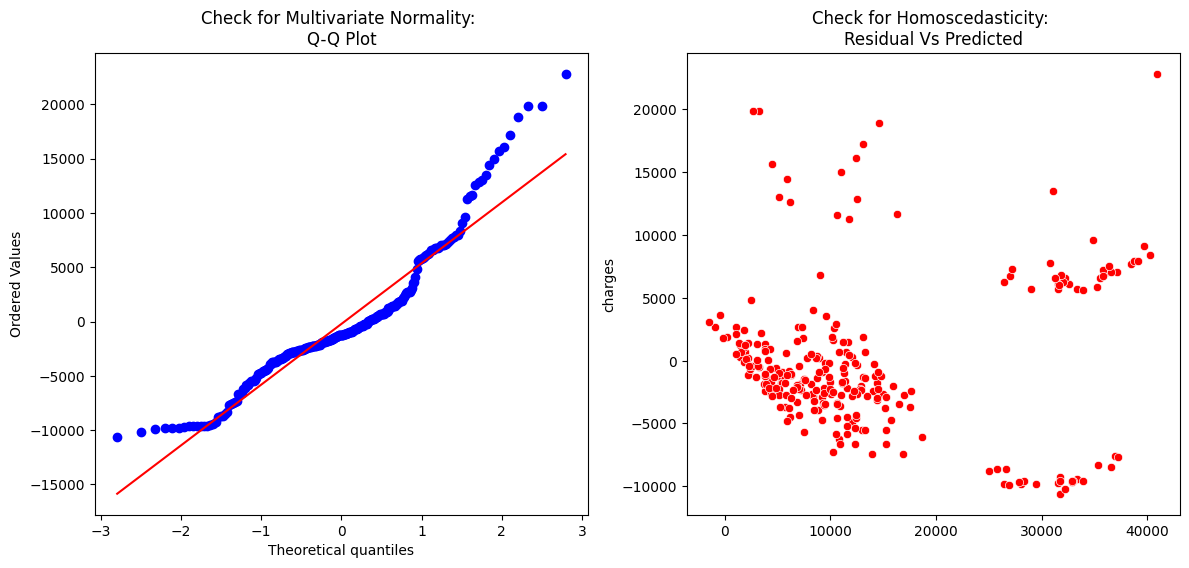

In [46]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_multiple),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_multiple), x= y_pred_multiple, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [48]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- r2_multiple)
VIF

4.615661073666555

# **15. Results and conclusion** <a class="anchor" id="15"></a>


[Table of Contents](#0.1)
The model assumption linear regression as follows
1. In our model  the actual vs predicted plot is curve so linear assumption fails
2. The residual mean is zero and residual error plot right skewed
3. Q-Q plot shows as value log value greater than 1.5 trends to increase
4. The plot is exhibit heteroscedastic, error will insease after certian point.
5. Variance inflation factor value is less than 5, so no multicollearity.

# **16. References** <a class="anchor" id="16"></a>


[Table of Contents](#0.1)



The work done in this project is inspired from following books and websites:-


1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0

5. https://jovian.com/aakashns/python-sklearn-linear-regression#C71

6. https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial

7. https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
